## Part 1 Inspecting and selecting working light curve

* [exoplanet.eu](http://exoplanet.eu/catalog/HAT-P-44_b/)

Created: 10/27/2017

Last run:
* 10/28

In [1]:
#check python version
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
#check environment
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

## import data

In [3]:
import glob

glob.glob('*.dat')

['lcf_msct_z_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcm_msct_r_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcm_msct_z_hatp44_170215_t2_c1_r9-14.bjd.dat',
 'lcf_msct_r_hatp44_170215_t2_c1_r9-14.bjd.dat',
 'lcf_msct_z_hatp44_170215_t2_c1_r9-14.bjd.dat',
 'lcf_msct_r_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcm_msct_z_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcm_msct_r_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcm_msct_g_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcf_msct_g_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcm_msct_z_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcf_msct_g_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcf_msct_r_hatp44_170215_t2_c13_r9-14.bjd.dat',
 'lcf_msct_z_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcm_msct_g_hatp44_170215_t2_c1_r9-14.bjd.dat',
 'lcm_msct_g_hatp44_170215_t2_c3_r9-14.bjd.dat',
 'lcf_msct_g_hatp44_170215_t2_c1_r9-14.bjd.dat',
 'lcm_msct_r_hatp44_170215_t2_c1_r9-14.bjd.dat']

In [4]:
name               = 'hatp44'
date               = '170215'
target_star_id     = '2'
comparison_star_id = '1' #13, #3
radii_range        = '9-14'
b                  = 'g'

#filename
fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
fname

'lcf_msct_g_hatp44_170215_t2_c1_r9-14.bjd.dat'

In [5]:
import pandas as pd

#df means dataframe
df=pd.read_csv(fname, delimiter=' ', parse_dates=True)

In [6]:
#print top n lines
n=3
df.head(n)

,BJD(TDB)-2450000,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),frame,flux(r=9.0),err(r=9.0),...,err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0),Unnamed: 20
0,7800.099692,1.9196,2564.1,-1.522,-0.067,10.40,13180.2,MSCL0_1702150533,0.997805,0.002302,...,0.002328,0.998154,0.002375,0.998058,0.002436,0.998373,0.002509,0.998092,0.002590,NaN
1,7800.100433,1.9102,2560.6,-1.843,0.175,10.10,13581.1,MSCL0_1702150534,0.995643,0.002284,...,0.002313,0.998239,0.002361,1.000560,0.002426,1.001977,0.002499,1.003748,0.002583,NaN
2,7800.101185,1.9007,2572.5,-1.062,-0.709,9.63,13743.7,MSCL0_1702150535,1.001389,0.002297,...,0.002325,1.001248,0.002374,1.000594,0.002434,1.001619,0.002509,1.001948,0.002590,NaN


In [7]:
df.columns

Index(['BJD(TDB)-2450000', 'airmass', 'sky(ADU)', 'dx(pix)', 'dy(pix)',
       'fwhm(pix)', 'peak(ADU)', 'frame', 'flux(r=9.0)', 'err(r=9.0)',
       'flux(r=10.0)', 'err(r=10.0)', 'flux(r=11.0)', 'err(r=11.0)',
       'flux(r=12.0)', 'err(r=12.0)', 'flux(r=13.0)', 'err(r=13.0)',
       'flux(r=14.0)', 'err(r=14.0)', 'Unnamed: 20'],
      dtype='object')

In [8]:
#remove unnecessary columns
df=df.drop(['frame','Unnamed: 20'],axis=1)
df.head(3)

,BJD(TDB)-2450000,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
0,7800.099692,1.9196,2564.1,-1.522,-0.067,10.40,13180.2,0.997805,0.002302,0.997585,0.002328,0.998154,0.002375,0.998058,0.002436,0.998373,0.002509,0.998092,0.002590
1,7800.100433,1.9102,2560.6,-1.843,0.175,10.10,13581.1,0.995643,0.002284,0.996653,0.002313,0.998239,0.002361,1.000560,0.002426,1.001977,0.002499,1.003748,0.002583
2,7800.101185,1.9007,2572.5,-1.062,-0.709,9.63,13743.7,1.001389,0.002297,1.001252,0.002325,1.001248,0.002374,1.000594,0.002434,1.001619,0.002509,1.001948,0.002590


In [9]:
#selecting a column
df['flux(r=9.0)'].head()

0    0.997805
1    0.995643
2    1.001389
3    0.995177
4    1.004532
Name: flux(r=9.0), dtype: float64

In [10]:
#selecting many columns
cols=['BJD(TDB)-2450000','flux(r=9.0)']
df[cols].head(3)

,BJD(TDB)-2450000,flux(r=9.0)
0,7800.099692,0.997805
1,7800.100433,0.995643
2,7800.101185,1.001389


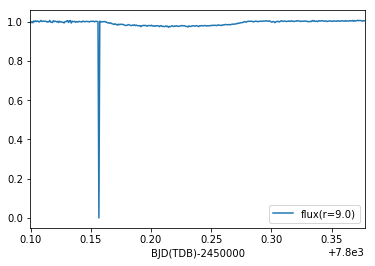

In [11]:
#default pandas plotting
%matplotlib inline

df.plot(x='BJD(TDB)-2450000',y='flux(r=9.0)')

## Removing outliers

In [12]:
#using numpy
import numpy as np

sigma=5.0
df=df[np.abs(df-df.mean())<=(sigma*df.std())]

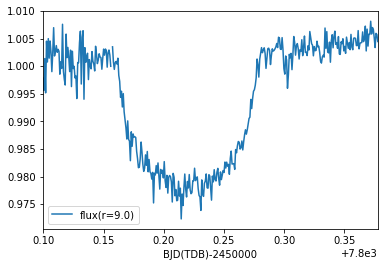

In [14]:
import matplotlib.pyplot as pl

df.plot(x='BJD(TDB)-2450000',y='flux(r=9.0)')

In [15]:
#set time as index
df = df.set_index('BJD(TDB)-2450000')
df.head(3)

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099692,1.9196,2564.1,-1.522,-0.067,10.40,13180.2,0.997805,0.002302,0.997585,0.002328,0.998154,0.002375,0.998058,0.002436,0.998373,0.002509,0.998092,0.002590
7800.100433,1.9102,2560.6,-1.843,0.175,10.10,13581.1,0.995643,0.002284,0.996653,0.002313,0.998239,0.002361,1.000560,0.002426,1.001977,0.002499,1.003748,0.002583
7800.101185,1.9007,2572.5,-1.062,-0.709,9.63,13743.7,1.001389,0.002297,1.001252,0.002325,1.001248,0.002374,1.000594,0.002434,1.001619,0.002509,1.001948,0.002590


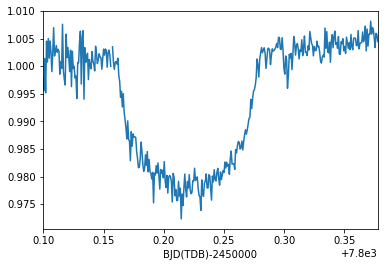

In [17]:
col = 'flux(r=9.0)'
df[col].plot()

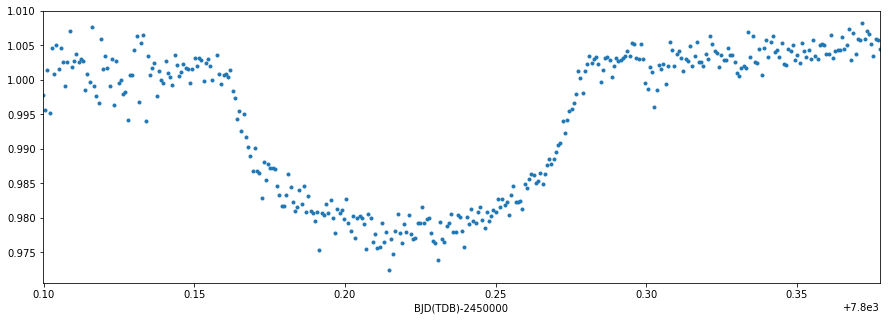

In [18]:
#prettier plotting
import matplotlib.pyplot as pl


#create a blank figure
figure, axis = pl.subplots(nrows=1,ncols=1,figsize=(15,5))

col='flux(r=9.0)'
df[col].plot(marker='.', linestyle='',ax=axis)

In [25]:
data={}
data2={} #df for outliers removed

bands='g,r,z'.split(',')
for b in bands:
    fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
    df=pd.read_csv(fname, delimiter=' ', parse_dates=True)
    #remove columns
    df=df.drop(['Unnamed: 20','frame'],axis=1)
    #set index
    df=df.set_index('BJD(TDB)-2450000')
    data[b]=df
    #remove outliers
    df2 = df[np.abs(df-df.mean())<=(sigma*df.std())]
    #set index
    #df2=df2.set_index('BJD(TDB)-2450000')
    data2[b]=df2

In [26]:
type(data2)

dict

In [27]:
data2.keys()

dict_keys(['g', 'r', 'z'])

In [28]:
data2['g'].head(3)

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099692,1.9196,2564.1,-1.522,-0.067,10.40,13180.2,0.997805,0.002302,0.997585,0.002328,0.998154,0.002375,0.998058,0.002436,0.998373,0.002509,0.998092,0.002590
7800.100433,1.9102,2560.6,-1.843,0.175,10.10,13581.1,0.995643,0.002284,0.996653,0.002313,0.998239,0.002361,1.000560,0.002426,1.001977,0.002499,1.003748,0.002583
7800.101185,1.9007,2572.5,-1.062,-0.709,9.63,13743.7,1.001389,0.002297,1.001252,0.002325,1.001248,0.002374,1.000594,0.002434,1.001619,0.002509,1.001948,0.002590


In [ ]:
fluxcol='flux(r=9.0)'

fig,ax = pl.subplots(1,1,figsize=(15,4))
for b in sorted(bands):
    df2[b][fluxcol].plot(label=b, ax=ax)

## Removing outliers

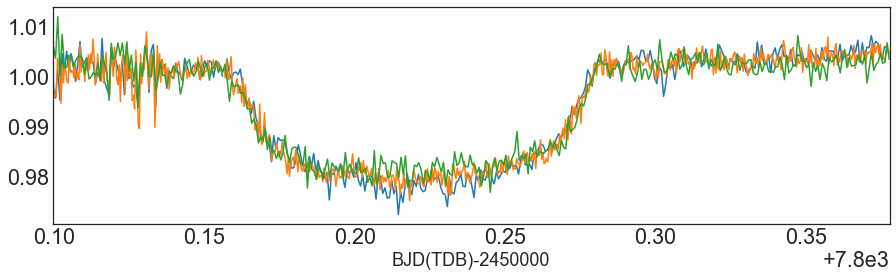

In [14]:
fluxcol='flux(r=9.0)'
sigma=5

fig,ax = pl.subplots(1,1,figsize=(15,4))
for b in sorted(bands):
    df=data[b]
    #remove outlier
    df=df[np.abs(df-df.mean())<=(sigma*df.std())]
    df[fluxcol].plot(label=b, ax=ax)

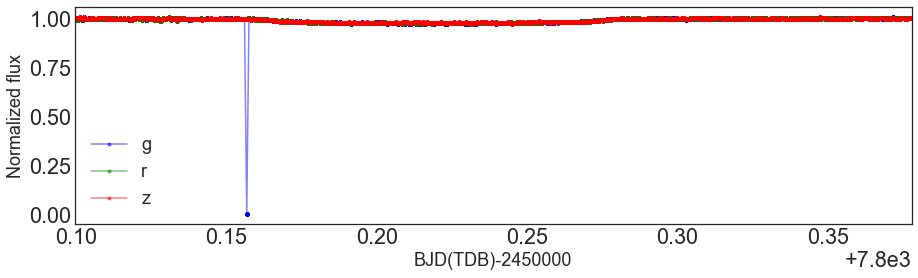

In [13]:
from astropy.stats import sigma_clip

outliers = {}
data2    = {} #outliers removed

colors='b,g,r'.split(',')
fig,ax = pl.subplots(1,1,figsize=(15,4))
for (b,c) in zip(sorted(bands),colors):
    df = data[b]
    #determine outliers
    fc = sigma_clip(df['flux(r=9.0)'], sigma_lower=3, sigma_upper=3)
    xc = sigma_clip(df['dx(pix)'], sigma_lower=3, sigma_upper=3)
    yc = sigma_clip(df[['dy(pix)']], sigma_lower=3, sigma_upper=3)
    outliers[b] = (xc.mask | yc.mask | fc.mask)
    #remove outliers
    df2 = df[~outliers[b]]
    data2[b] = df2
    df2['flux(r=9.0)'].plot(label=b, marker='.', color=c, alpha=0.5, ax=ax)
    ax.set_ylabel('Normalized flux')
pl.legend()

## Save

In [11]:
for b in sorted(bands):
    fname='hatp44_QL_{}-band.csv'.format(b)
    data2[b].to_csv(fname)